

#1. Dataset: Iris

Descripción: Esta es quizás la base de datos más conocida que se puede encontrar en la literatura sobre reconocimiento de patrones. El conjunto de datos contiene 3 clases de 50 instancias cada una, donde cada clase se refiere a un tipo de planta de iris.

-Instancias: 150

-Atributos: 4 

-Output: clase de planta de iris.

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class: Iris Setosa, Iris Versicolour, Iris Virginica



#2.Montando google drive 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = r'/content/drive/Shareddrives/Data Science para Geociencias/5. Rendimiento de los modelos'
name = 'iris_dataset.csv'

# 3. Importando librerías

In [ ]:
import numpy as ___
import ____ as plt
import pandas as ____
import seaborn as sns
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import itertools
import os

In [ ]:
path_file = os.path.join(____,___)

#4. Lectura y visualización del dataset

In [ ]:
dataset = pd.read_csv(path_file)
dataset=dataset.drop_duplicates()
dataset.____()

,Sepal_lengh,Sepal_width,Petal_length,Petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
dataset._____()

,Sepal_lengh,Sepal_width,Petal_length,Petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
dataset.groupby('species').size()

species
Iris-setosa        48
Iris-versicolor    50
Iris-virginica     49
dtype: int64

Visualización de los pares de atributos con Seaborn

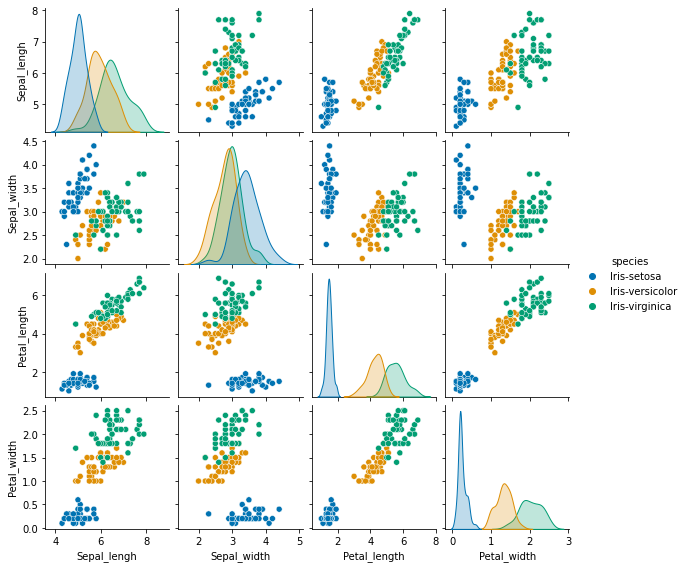

In [ ]:
____.pairplot(dataset, hue="species", height = 2, palette = 'colorblind');

Codificando las etiquetas

In [ ]:
le = LabelEncoder()
dataset['species'] = le.fit_transform(dataset.species.values)
clases = dataset['species'].unique()

# 5. Dividir el conjunto de datos en el conjunto de entrenamiento y el conjunto de prueba

In [ ]:
from sklearn.model_selection import train_test_split
train, test= train_test_split(dataset,  test_size = ____, stratify = dataset['species'], random_state = 42)


In [ ]:
print(f'Dimension de los datos de entrenamiento {len(train)}')
print(f'Dimension de los datos de prueba {len(test)}')

Dimension de los datos de entrenamiento 117
Dimension de los datos de prueba 30


Renombrando los conjuntos de entrenamiento y prueba

In [ ]:
X_train = train[['Sepal_lengh','Sepal_width','Petal_length','Petal_width']]
y_train = train.species
X_test =  test[['Sepal_lengh','Sepal_width','Petal_length','Petal_width']]
y_test= test.species

#6. Entrenando un modelo de clasificación por árboles de decisión

In [ ]:
classifier = DecisionTreeClassifier(max_depth = 3, random_state = 0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

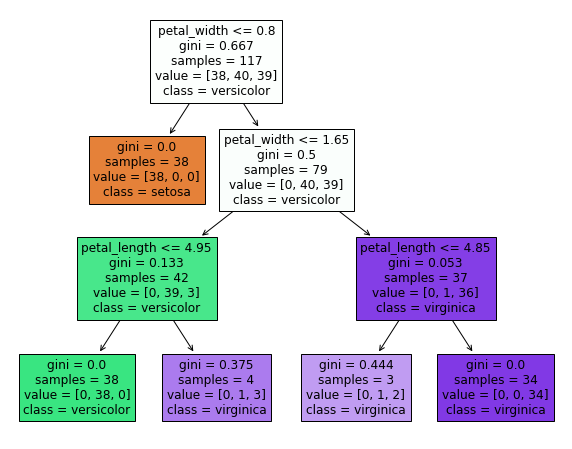

In [ ]:
fn = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
cn = ['setosa', 'versicolor', 'virginica']
plt.figure(figsize = (10,8))
plot_tree(classifier, feature_names = fn, class_names = cn, filled = True);

#7. Predicción de clases nuevas


In [ ]:
y_pred=classifier.predict(X_test)

# 8. Matriz de confusión y valor de accuracy

In [ ]:
from sklearn.metrics import _______, ______
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


0.9666666666666667

 # 9. Mejorando la visualización de la matriz de confusión y de las métricas

Funciones generadas para visualización y posterior uso


In [ ]:
def plot_confusion_matrix(cm, classes, tit, normalize=False):
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)
        title, fmt = 'Matriz de confusión normalizada', '.2f'
    else:
        title, fmt = tit, 'd'
    plt.figure(figsize=(10,8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)#, fontsize=12)
    plt.colorbar(pad=0.05)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=40)
    plt.yticks(tick_marks, classes)
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center", 
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Clase Verdadera')#, fontsize=10)
    plt.xlabel('Clase Predicha')#, fontsize=10)
    plt.savefig(title+'.png')
    #plt.grid(b=None)
    plt.show()
    
def sens_spec(cls_names, y_true, y_pred, pesos):
  sensitivity = []
  specificity = []
  prec=[]
  fscore = []
  sd = []
  for i,name in enumerate(cls_names):
    TP = np.sum((y_true==name) & (y_pred==name))
    TN = np.sum((y_true!=name) & (y_pred!=name))
    FP = np.sum((y_true!=name) & (y_pred==name))
    FN = np.sum((y_true==name) & (y_pred!=name))
    sensitivity.append(TP/(TP+FN))
    specificity.append(FP/(TN+FP))
    prec.append(TP/(TP+FP))
    fscore.append(2*(prec[i]*sensitivity[i])/(prec[i]+sensitivity[i]))
  sensitivity.append(sum([x*y for x,y in zip(sensitivity,pesos)]))
  specificity.append(sum([x*y for x,y in zip(specificity,pesos)]))
  prec.append(sum([x*y for x,y in zip(prec,pesos)]))
  fscore.append(sum([x*y for x,y in zip(fscore,pesos)]))
  for i in range(len(cls_names)):
    sd.append(np.sqrt((sensitivity[i]-sensitivity[-1])**2))
  sd.append(np.nan)
  return sensitivity, specificity, prec, fscore, sd

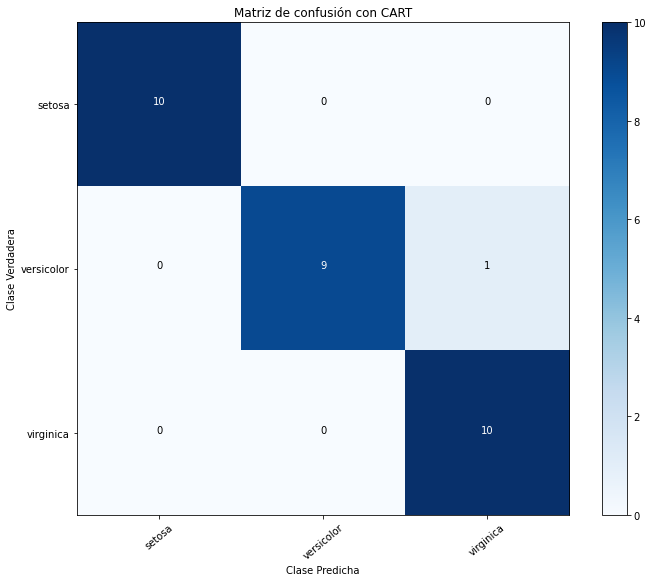

In [ ]:
predictions = np.float32(y_pred)
true_labels = np.float32(y_test)
n_classes = 3

cnf_matrix = confusion_matrix(true_labels, predictions, labels=range(n_classes))
tit = 'Matriz de confusión con CART'
plot_confusion_matrix(cnf_matrix,cn, tit, normalize=_____)

In [ ]:
pesos = dataset['species'].value_counts().sort_index().tolist()/ np.sum(dataset['species'].value_counts().tolist())
print(____)

[0.32653061 0.34013605 0.33333333]


# 9. Métricas por clase

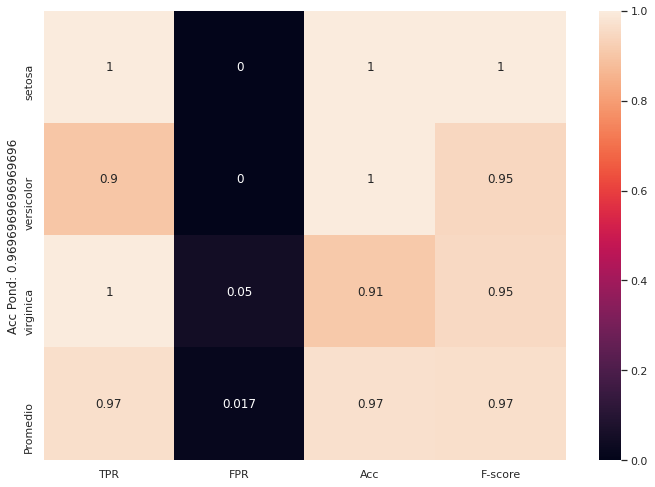

In [ ]:
sensitivity, FPR, prec, fscore, sd = sens_spec(range(n_classes), true_labels, predictions, ___)
d = {'TPR':sensitivity, 'FPR':FPR, 'Acc':prec, 'F-score':fscore}
ind = cn+['Promedio']
df = pd.DataFrame(d, index=ind)#.transpose()
index = df.index
precprom = sum([x*y for x,y in zip(prec,pesos)])
index.name = 'Acc Pond: %s'%precprom
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df, annot=True)